In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
data_path0 = "../../data_3eig/02_processed/02_npt/prod_0/"
data_path1 = "../../data_3eig/02_processed/02_npt/prod_1/"
data_path2 = "../../data_3eig/02_processed/02_npt/prod_2/"
data_path3 = "../../data_3eig/02_processed/02_npt/prod_3/"
data_path4 = "../../data_3eig/02_processed/02_npt/prod_4/"
data_path5 = "../../data_3eig/02_processed/02_npt/prod_5/"
data_path6 = "../../data_3eig/02_processed/02_npt/prod_6/"

In [3]:
os.system("cat " + data_path6 + "06_prod6_header.txt")

# This file was created Wed Jan  8 19:16:33 2025
# Created by:
#                      :-) GROMACS - gmx energy, 2021.4 (-:
# 
# Executable:   /usr/local/gromacs/bin/gmx
# Data prefix:  /usr/local/gromacs
# Working dir:  /home/giacomo/comp_bio/cbp_final/data_3eig/02_processed/02_npt/prod_6
# Command line:
#   gmx energy -f step5_prod_6.edr
# gmx energy is part of G R O M A C S:
#
# Glycine aRginine prOline Methionine Alanine Cystine Serine
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(K), (bar), (kg/m^3)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Temperature"
@ s1 legend "Pressure"
@ s2 legend "Density"


0

In [4]:
tem_df0 = pd.read_csv(data_path0 + "00_prod0.xvg", header = None, names = ["t", "T", "P", "RMSD", "n"], sep = " ", skipinitialspace=True)
tem_df1 = pd.read_csv(data_path1 + "01_prod1.xvg", header = None, names = ["t", "T", "P", "RMSD", "n"], sep = " ", skipinitialspace=True)
tem_df2 = pd.read_csv(data_path2 + "02_prod2.xvg", header = None, names = ["t", "T", "P", "RMSD", "n"], sep = " ", skipinitialspace=True)
tem_df3 = pd.read_csv(data_path3 + "03_prod3.xvg", header = None, names = ["t", "UB", "T", "P", "RMSD", "n"], sep = " ", skipinitialspace=True)
tem_df4 = pd.read_csv(data_path4 + "04_prod4.xvg", header = None, names = ["t", "T", "P", "n"], sep = " ", skipinitialspace=True)
tem_df5 = pd.read_csv(data_path5 + "05_prod5.xvg", header = None, names = ["t", "T", "P", "n"], sep = " ", skipinitialspace=True)
tem_df6 = pd.read_csv(data_path6 + "06_prod6.xvg", header = None, names = ["t", "T", "P", "n"], sep = " ", skipinitialspace=True)
# third xvg has rows in different order cuz i am dumm -GM
tem_df3 = tem_df3[["t", "T", "P", "RMSD", "n"]]

In [5]:
# row0 = len(tem_df0)-1
# adj_term = tem_df0[0].iloc[-1] + 2
# tem_df1[0] = tem_df1[0] + adj_term

In [6]:
# concatenate 2 df
tem_df = pd.concat([tem_df0, tem_df1, tem_df2, tem_df3, tem_df4, tem_df5, tem_df6])
# Note - this solution is less general, as it assumes that the time step is 2 (ps), but is easier 
# to concatenate many dfs. 
# - GM
tem_df["t"] = 2 * np.arange(len(tem_df))

In [7]:
window_size = 1000
window_size_P = 10000

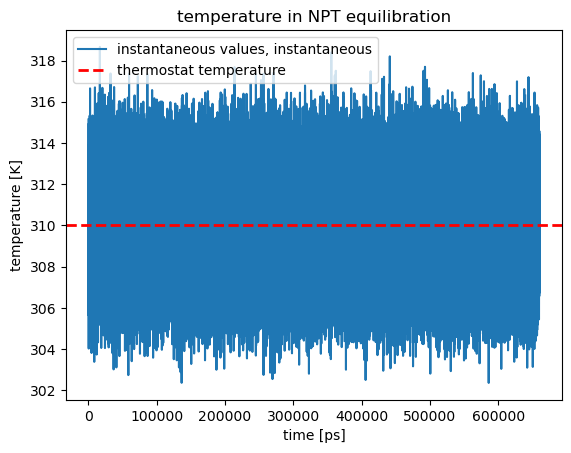

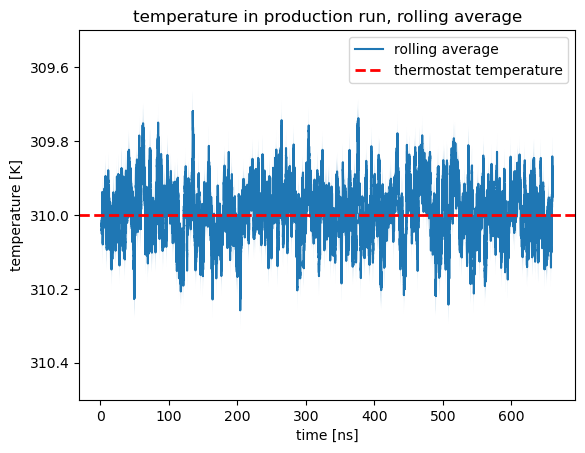

In [8]:
plt.plot(tem_df["t"], tem_df["T"], label = "instantaneous values, instantaneous")
plt.title("temperature in NPT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

errors_temp = np.sqrt(tem_df["T"].rolling(window_size).var() / tem_df["T"].rolling(window_size).count())
cum_temp = tem_df["T"].rolling(window_size).mean()
plt.plot(tem_df["t"] / 1000, cum_temp, label = "rolling average")
plt.fill_between(tem_df["t"] / 1000, cum_temp + errors_temp, cum_temp - errors_temp, alpha=0.3)
plt.title("temperature in production run, rolling average")
plt.xlabel("time [ns]")
plt.ylabel("temperature [K]")
plt.ylim(310.5, 309.5)
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

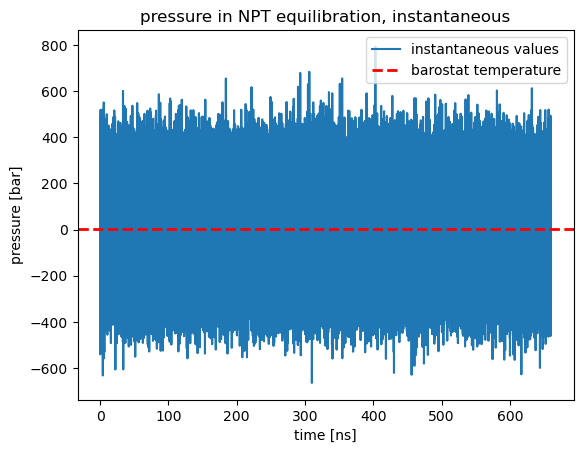

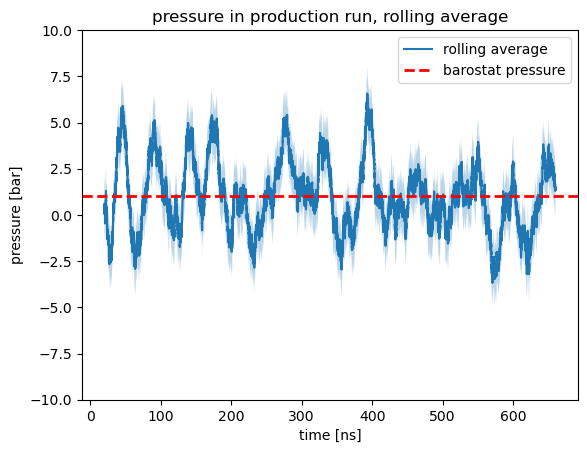

In [9]:
plt.plot(tem_df["t"] / 1000, tem_df["P"], label = "instantaneous values")
plt.title("pressure in NPT equilibration, instantaneous")
plt.xlabel("time [ns]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.show()

cum_press = tem_df["P"].rolling(window_size_P).mean()
errors_press = np.sqrt(tem_df["P"].rolling(window_size_P).var() / tem_df["P"].rolling(window_size_P).count())
plt.plot(tem_df["t"] / 1000, cum_press, label = "rolling average")
plt.fill_between(tem_df["t"] / 1000, cum_press + errors_press, cum_press - errors_press, alpha=0.3)
plt.title("pressure in production run, rolling average")
plt.xlabel("time [ns]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat pressure")
plt.legend()
plt.ylim(-10,10)
plt.show()

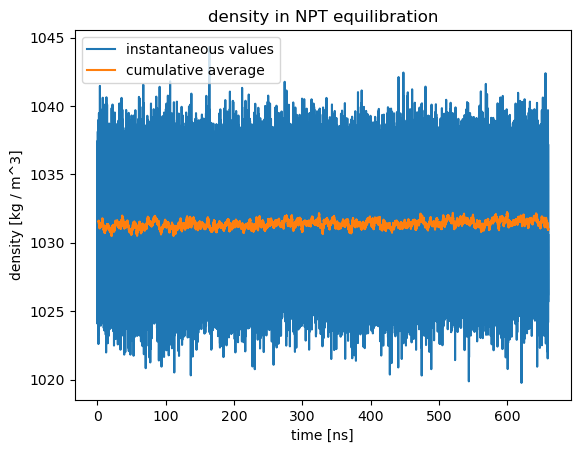

In [10]:
plt.plot(tem_df["t"] / 1000, tem_df["n"], label = "instantaneous values")
plt.plot(tem_df["t"] / 1000, tem_df["n"].rolling(window_size).mean(), label = "cumulative average")
plt.title("density in NPT equilibration")
plt.xlabel("time [ns]")
plt.ylabel("density [kg / m^3]")
plt.legend()
plt.show()